# Exploratory Data Analysis and Regression on Movies Dataset

## Introduction

The objective of performing the EDA and Regression is to understand what the hollywood movie industry was like in the years spanning 2012 - 2016. One can understand from the data, what the kind of movies were made during the said period and discern the budget and Revenue distribution across all the genres. Singular variable data analysis to bivariate data analysis would give sufficient insight into the data aswell. 
    Empowered with the knowledege, myriad business decisions can be made, say for example, a new production company based out of India wants to break into hollywood. With the following data analysis as preliminary research one can get the outline as to what would be right course of action.
    

## Data Collection and Methodology

 - Secondary data was collected from Google Big-Query
 - The sample consists of 500 movies from the years 2012 to 2016
 - The data consisted of various columns of which the relevant ones were chosen for analysis
 - In order to understand how movie reviews affected revenue, we made use of derived data of Metascore from an online source- metacritic.com
 - No primary data was collected for analysis
 
 
 ### Why Metascore
 
 - Metascore is a score of critic review which is widely accepted in the West 
 - This is clearly showcased by the fact that it has a normal distribution
 - The other rating options available were IMDb, Fandango and Tomatometer
 - Distribution of different rating systems is given below:

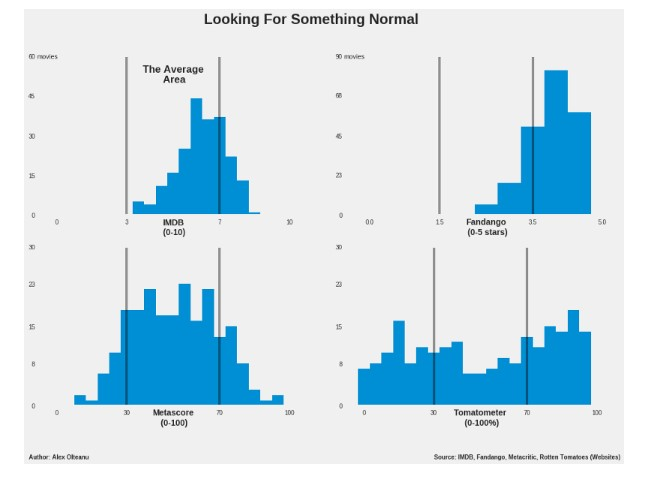

- The choice was made on the research given here
 
 
 https://www.freecodecamp.org/news/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19/
 

### Importing dataset as csv file

In [1]:
#Importing data from the csv file
import pandas as pd

# Reading data file in pandas dataframe
df = pd.read_csv('BigQuery - movie_data.csv')
#Checking the data
df.head()

,Movie_Title,Release_Date,Wikipedia_URL,Genre,Director__1_,Director__2_,Cast__1_,Cast__2_,Cast__3_,Cast__4_,Cast__5_,Budget_,Revenue,Metascore
0,No Good Deed,9/12/2014,https://en.wikipedia.org/wiki/No_Good_Deed_(20...,Crime,Sam Miller,NaN,Idris Elba,Taraji P. Henson,Henry Simmons,NaN,NaN,13200000,54300000,26.0
1,Prisoners,9/20/2013,https://en.wikipedia.org/wiki/Prisoners_(2013_...,Crime,Denis Villeneuve,NaN,Jake Gyllenhaal,Hugh Jackman,Paul Dano,Melissa Leo,Viola Davis,46000000,122100000,70.0
2,Secret in Their Eyes,11/20/2015,https://en.wikipedia.org/wiki/Secret_in_Their_...,Crime,Billy Ray,NaN,Julia Roberts,Nicole Kidman,Chiwetel Ejiofor,Dean Norris,NaN,19500000,32200000,45.0
3,American Sniper,11/11/2014,https://en.wikipedia.org/wiki/American_Sniper,Drama,Clint Eastwood,NaN,Bradley Cooper,Sienna Miller,Max Charles,Luke Grimes,NaN,58800000,547400000,72.0
4,Argo,10/12/2012,https://en.wikipedia.org/wiki/Argo_(2012_film),Drama,Ben Affleck,NaN,Ben Affleck,John Goodman,Alan Arkin,Bryan Cranston,Victor Garber,44500000,232300000,86.0


In [2]:
#Gathering Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_Title    500 non-null    object 
 1   Release_Date   500 non-null    object 
 2   Wikipedia_URL  500 non-null    object 
 3   Genre          500 non-null    object 
 4   Director__1_   500 non-null    object 
 5   Director__2_   40 non-null     object 
 6   Cast__1_       500 non-null    object 
 7   Cast__2_       495 non-null    object 
 8   Cast__3_       477 non-null    object 
 9   Cast__4_       446 non-null    object 
 10  Cast__5_       384 non-null    object 
 11  Budget_        500 non-null    int64  
 12  Revenue        500 non-null    int64  
 13  Metascore      493 non-null    float64
dtypes: float64(1), int64(2), object(11)
memory usage: 54.8+ KB


### Observations from the data
1. The data contains 13 columns, of which 2 are numerical continous data
2. Metascore is also a numerical data with discrete measurement
3. Genre is nominal data
4. Our variables of interest are: Budget, Revenue, Genre and Metascore
5. Release_Date is an inherent EDA variable

### Data Pre-processing 

1. Droping irrelevant columns from the data
2. Renaming variables of interest
3. Converting Release_Date string object to date-time object
4. Extracting year and month from Date for further analysis
5. Sorting the index

In [3]:
# Extracting relevant columns
d = df.drop(['Wikipedia_URL', 'Director__1_', 'Director__2_', 
             'Cast__1_', 'Cast__2_','Cast__3_',
             'Cast__4_','Cast__5_'] ,axis = 1)

#Renaming columns for simplicity
d = d.rename(columns = {'Movie_Title':'Title', 'Budget_': 'Budget'})

#Checking the new dataframe
d.head(1)

,Title,Release_Date,Genre,Budget,Revenue,Metascore
0,No Good Deed,9/12/2014,Crime,13200000,54300000,26.0


In [4]:
# Converting Release_date to date time object
d['Release_Date'] = pd.to_datetime(d['Release_Date'])

#Extracting year from date_time object
d['Year'] = pd.DatetimeIndex(d["Release_Date"]).year
d['Month'] = pd.DatetimeIndex(d["Release_Date"]).month
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         500 non-null    object        
 1   Release_Date  500 non-null    datetime64[ns]
 2   Genre         500 non-null    object        
 3   Budget        500 non-null    int64         
 4   Revenue       500 non-null    int64         
 5   Metascore     493 non-null    float64       
 6   Year          500 non-null    int64         
 7   Month         500 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 31.4+ KB


In [5]:
# Sorting data on date
d.sort_values('Release_Date', inplace = True)
d = d.reset_index(drop = True)
d.head()

,Title,Release_Date,Genre,Budget,Revenue,Metascore,Year,Month
0,The Devil Inside,2012-01-06,Horror,1000000,101800000,18.0,2012,1
1,Red Tails,2012-01-20,Drama,58000000,50400000,46.0,2012,1
2,Man on a Ledge,2012-01-27,Action,42000000,46200000,40.0,2012,1
3,One for the Money,2012-01-27,Crime,40000000,36900000,22.0,2012,1
4,Declaration of War,2012-01-27,Romance,1500000,6500000,73.0,2012,1


In [6]:
# Importing more libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Checking for null values
d.isnull().sum()

Title           0
Release_Date    0
Genre           0
Budget          0
Revenue         0
Metascore       7
Year            0
Month           0
dtype: int64

 - We can see from the above info that Metascore has 7 missing values
 - Missing value imputation is done with the mean value of Metascore

Text(0.5, 1.0, 'Missing value in the dataset')

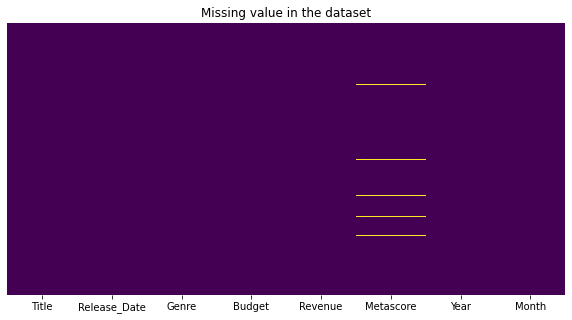

In [8]:
# Heatmap of missing values 
plt.figure(figsize=(10,5))
sns.heatmap(d.isnull(),cbar=False,cmap='viridis', yticklabels=False)
plt.title('Missing value in the dataset')

In [9]:
# Imputing missing values in the data with mean as the data is normally distributed
d["Metascore"].fillna(round(d.Metascore.mean()), inplace =True)

In [10]:
# Checking for any remaining missing values
d.isnull().sum()

Title           0
Release_Date    0
Genre           0
Budget          0
Revenue         0
Metascore       0
Year            0
Month           0
dtype: int64

 - There are no further missing values in the Data and the data is ready for analysis

## Statistics and Statistical plots of variables of interest

### Genre

In [11]:
# Unique values genre
print(f'There are {d.Genre.nunique()} number of unique Genres')
print()
print(f'List of Genres are: {d.Genre.unique()}')

There are 17 number of unique Genres

List of Genres are: ['Horror' 'Drama' 'Action' 'Crime' 'Romance' 'Sci-Fi' 'Adventure' 'Comedy'
 'Family' 'Fantasy' 'Thriller' 'Musical' 'Biography' 'Mystery'
 'Documentary' 'Religious' 'Animation']


In [12]:
d.Genre.value_counts()

Action         118
Comedy          95
Drama           89
Horror          42
Sci-Fi          28
Crime           23
Adventure       20
Thriller        16
Biography       15
Family          12
Romance         12
Fantasy         10
Religious        7
Mystery          5
Musical          4
Animation        3
Documentary      1
Name: Genre, dtype: int64

Text(0.5, 0, 'Count of Genre for all time')

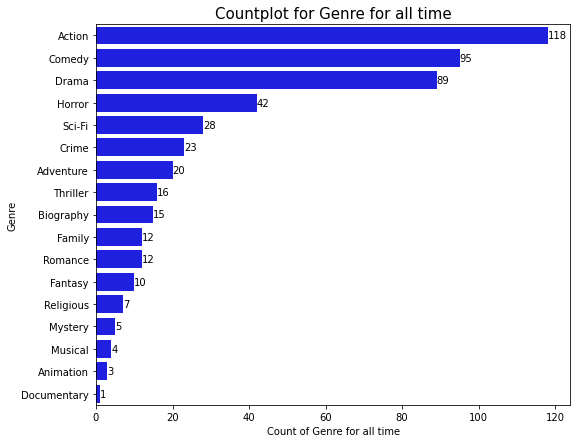

In [13]:
# visualizing the value counts of Genre
fig1 , ax1 = plt.subplots(figsize= (8.5,7))
ax1 = sns.countplot(y = d.Genre, 
                    order = d.Genre.value_counts().index
                    , hue_order = d['Genre'].value_counts(), color = 'b' )
ax1.set_title('Countplot for Genre for all time',fontsize = 15 )
ax1.bar_label(container = ax1.containers[0], labels = d['Genre'].value_counts())
ax1.set_xlabel('Count of Genre for all time')

 - Action genre has maximum count of movies, followed by Comedy and Drama

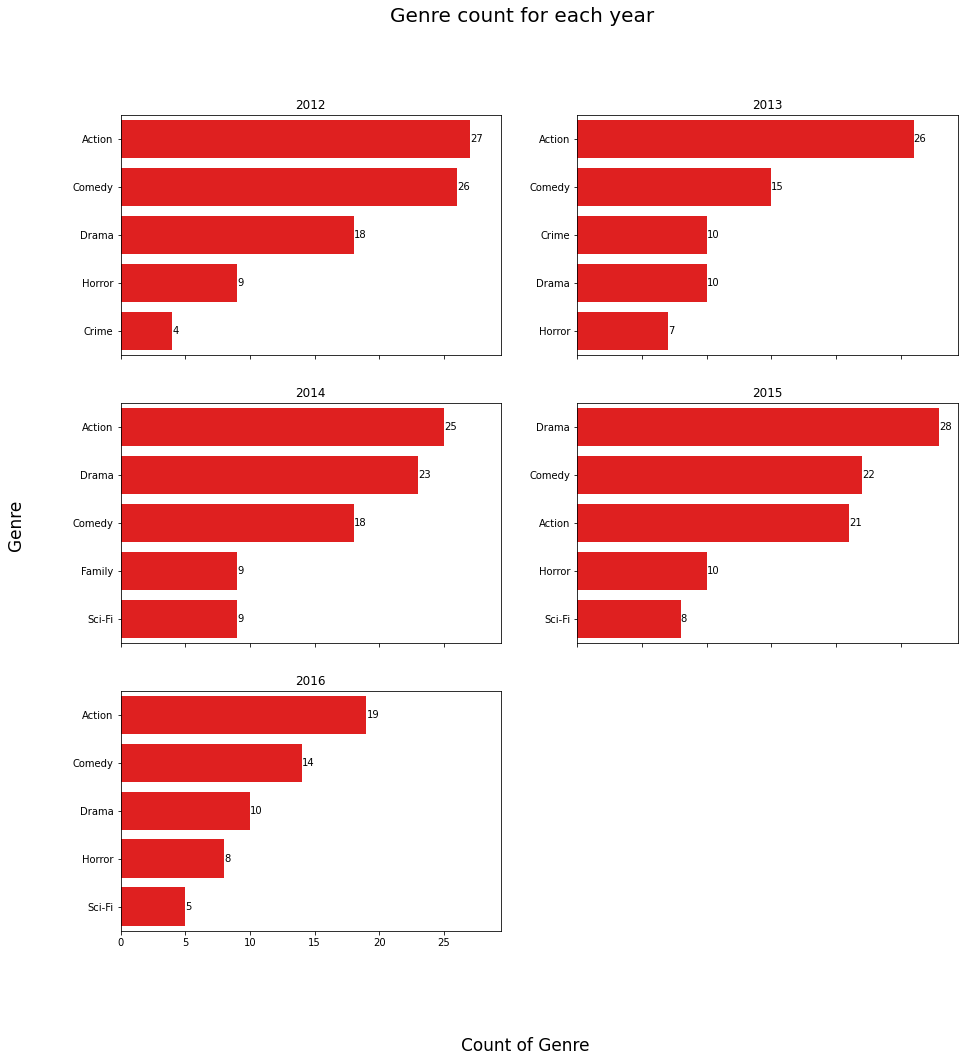

In [14]:
#ax[0].bar_label(container = ax[0].containers[0], labels = d[d['Year'] == 2012].Genre.value_counts())

fig, ((ax1, ax2),(ax3, ax4),(ax5,ax6)) = plt.subplots(nrows = 3,ncols = 2,sharex = True,figsize=(15, 15))
ax6.set_visible(False)
fig.suptitle('Genre count for each year ', fontsize = 20)
fig.supxlabel('Count of Genre', fontsize = 17)
fig.supylabel('Genre', fontsize =17)
for i, ax in enumerate((ax1,ax2,ax3,ax4,ax5)):
    sns.countplot(y = d[d['Year'] == i+2012].Genre, 
                        order = d[d['Year'] == i+2012].Genre.value_counts().iloc[:5].index, 
                        color = 'red',ax=ax)
    ax.bar_label(container = ax.containers[0],
                labels = d[d['Year'] == i+2012]['Genre'].value_counts().iloc[:5],
                fontsize = 10)
    ax.set_title(str(i+2012))
    ax.set(xlabel=None)
    ax.set(ylabel=None)

 - Action movies has the highest count for all the years, and comedy genre takes the second spot expect in the year 2014 in which Drama took over comedy

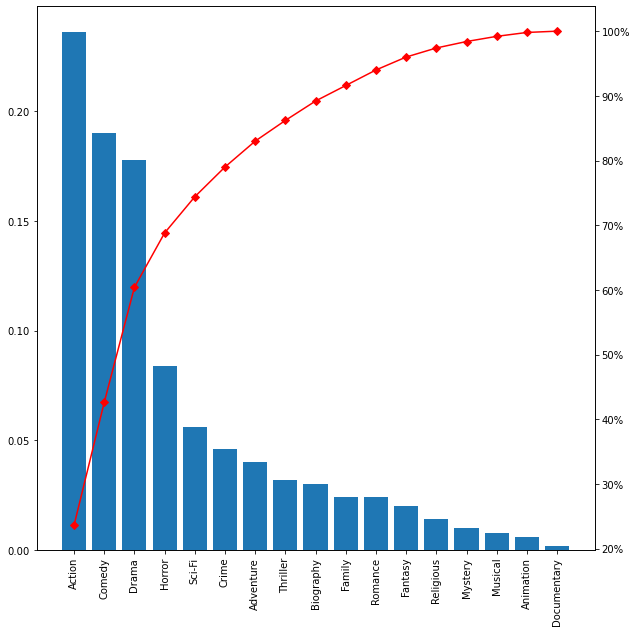

In [15]:
# Making Pareto diagram to identify key genres
# made during the given time horizon
import warnings
warnings.filterwarnings('ignore')

par = pd.DataFrame(d['Genre'].value_counts(normalize = True))
par['cum_freq'] =  par['Genre'].cumsum()/par['Genre'].sum()*100
par.sort_values('cum_freq')

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
#create basic bar plot
fig, ax = plt.subplots(figsize = (10,10))
ax.set_xticklabels(par.index, rotation = 90)
ax.bar( par.index,par['Genre'])
#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(par.index, par['cum_freq'], color = 'red', marker="D")
ax2.yaxis.set_major_formatter(PercentFormatter())

#### From the above Pareto chart we can infer that 80% of the movies were from 5 genres - Action, Comedy, Drama, Horror, Sci-Fi, and Crime 

## Numerical Variable Statistics and Statistical Plots
### Budget , Revenue and Metascore

In [16]:
# Descriptive statistics of Budget, Revenue and Metascore
d[['Budget', "Revenue", "Metascore"]].describe()

,Budget,Revenue,Metascore
count,5.000000e+02,5.000000e+02,500.000000
mean,4.942534e+07,1.533837e+08,52.570000
std,4.938141e+07,1.842147e+08,17.173204
min,1.000000e+06,1.000000e+06,11.000000
25%,1.485000e+07,3.192500e+07,40.000000
50%,3.000000e+07,8.265000e+07,52.500000
75%,6.500000e+07,2.066750e+08,65.000000
max,2.500000e+08,9.708000e+08,100.000000


### Histogram and Box-plot of numeric variables

- Budget and Revenue are right skewed while Metascore looks normally distributed.
- Budget and Revenue have outliers as we can see from the box plot. Metascore does not have outliers.
- Metascore being normally distributed for the years 2012-2016 is in conformance with the population Metascore

#### Throttling the outliers as the linear is susceptible to themm

In [17]:
print(d['Budget'].quantile(0.05)) 
print(d['Budget'].quantile(0.95)) 

3000000.0
150000000.0


In [18]:
import numpy as np
# To replace any value greater than 95th quantile value with the 95th quantile value 
d['Budget'] = np.where(d['Budget'] > 150000000.0, 150000000.0, d['Budget'])
# To replace any value lesser than 5th quantile value with the 5th quantile value 

In [19]:
print(d['Revenue'].quantile(0.05)) 
print(d['Revenue'].quantile(0.95))

4355000.000000003
555469999.9999985


In [20]:
# To replace any value greater than 95th quantile value with the 95th quantile value 
d['Revenue'] = np.where(d['Revenue'] > 555469999.9999985, 555469999.9999985, d['Revenue'])
# To replace any value lesser than 5th quantile value with the 5th quantile value 

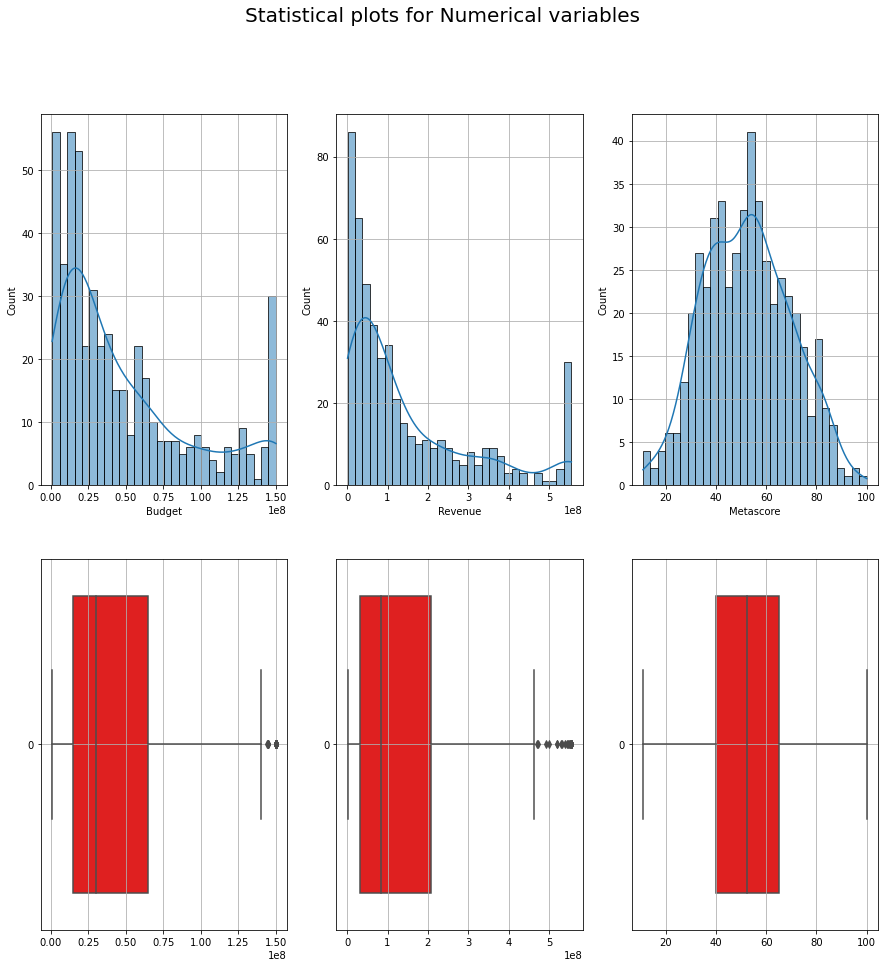

In [21]:
# Statistical Plots for the 5 point summary being: Histogram and Boxplot
fig ,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(ncols = 3, nrows = 2, figsize = (15,15))
fig.suptitle('Statistical plots for Numerical variables ', fontsize = 20)
sns.histplot(data = d.Budget, bins = 30, kde = True, ax = ax1 ); ax1.grid()
sns.histplot(data = d.Revenue, bins = 30 , kde = True,ax = ax2 ); ax2.grid()
sns.histplot(data = d.Metascore, bins = 30, kde = True, ax = ax3 ); ax3.grid()
sns.boxplot(data = d.Budget,orient = 'h',color = 'red',ax = ax4); ax4.grid()
sns.boxplot(data = d.Revenue,orient = 'h', color = 'red',ax = ax5); ax5.grid()
sns.boxplot(data = d.Metascore,orient = 'h', color = 'red',ax = ax6); ax6.grid()

### Skewness in the Data

In [22]:
print(f"Skewness of Budget: {d['Budget'].skew()}")
print(f"Skewness of Revenue: {d['Revenue'].skew()}")
print(f"Skewness of Metascore: {d['Metascore'].skew()}")

Skewness of Budget: 1.1021796903425618
Skewness of Revenue: 1.3827865071292476
Skewness of Metascore: 0.13635788322305772


In [23]:
# Statistical Values of Budget and Revenue summarised
data = {'Budget': {'Mean':4.942534e+07, 'Std':4.938141e+07, 'Skew':1.55, 'Coeff_variation': 0.99},
        'Revenue': {'Mean':1.533837e+08, 'Std':1.842147e+08, 'Skew':1.94, 'Coeff_variation':1.20},
        'Metascore':{'Mean': 52.56, 'Std': 17.17, 'Skew': 0.1374, 'Coeff_Variation': 0.33       }  }
tf = pd.DataFrame.from_dict(data, orient ='index')
tf

,Mean,Std,Skew,Coeff_variation,Coeff_Variation
Budget,4.942534e+07,4.938141e+07,1.5500,0.99,NaN
Revenue,1.533837e+08,1.842147e+08,1.9400,1.20,NaN
Metascore,5.256000e+01,1.717000e+01,0.1374,NaN,0.33


 - We can see from the above dataframe that Budget and Revenue are positively skewed whereas Metascore's skewness value is very close to zero, which implies that Metascore is normally distributed

### Time series plots of Budget and Revenue

In [24]:
d2 = d.groupby(['Year', 'Month'])[['Budget', 'Revenue']].sum().reset_index()
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     53 non-null     int64  
 1   Month    53 non-null     int64  
 2   Budget   53 non-null     float64
 3   Revenue  53 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.8 KB


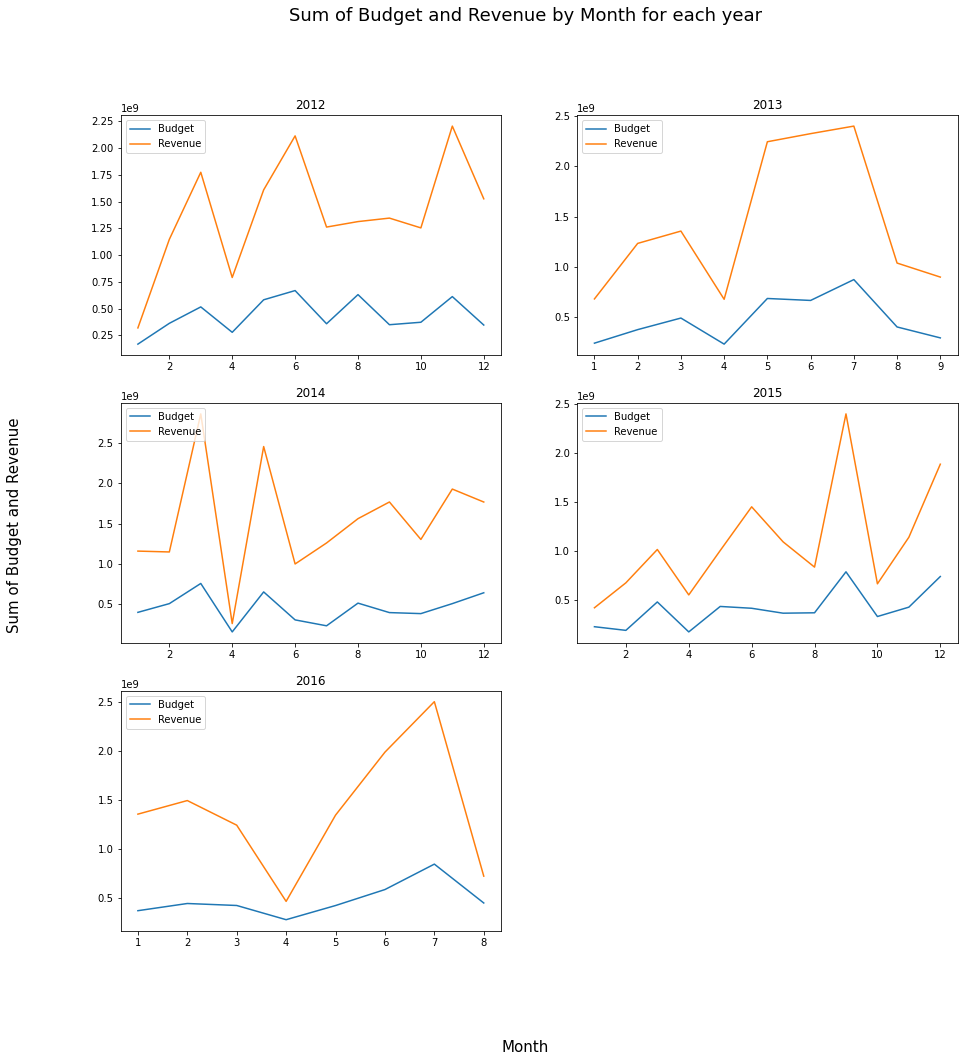

In [25]:
# Line Plots for Budget and Revenue with Time

fig , ((ax1, ax2),(ax3, ax4),(ax5,ax6)) = plt.subplots(3,2, figsize = (15,15))
fig.suptitle('Sum of Budget and Revenue by Month for each year', fontsize = 18)
fig.supylabel('Sum of Budget and Revenue', fontsize = 15)
fig.supxlabel('Month', fontsize =15)
ax6.set_visible(False)
for i, ax in enumerate((ax1,ax2,ax3,ax4,ax5)):
    ax.plot( d2[d2['Year'] == i+2012].Month,  d2[d2['Year'] == i+2012].Budget, label = 'Budget') 
    ax.plot( d2[d2['Year'] == i+2012].Month,  d2[d2['Year'] == i+2012].Revenue, label = 'Revenue')
    ax.set_title(str(i+2012))
    ax.legend(loc='upper left')    

 - The above time series plots show that overall, Budget and Revenue show similar trend

# Bivariate analysis

In [26]:
d_group = d.groupby('Genre')[['Budget', 'Revenue', 'Metascore']].agg('mean')
d_group = d_group.reset_index()
d_group = d_group.sort_values(by = 'Budget', ascending = False)

<AxesSubplot:xlabel='Genre', ylabel='Budget'>

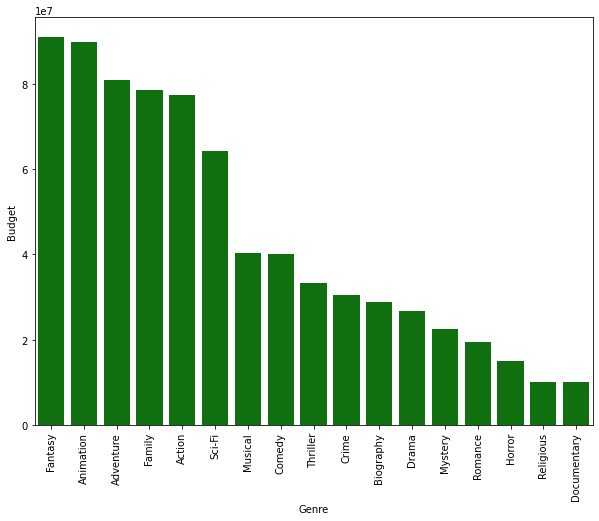

In [27]:
d_group = d_group.sort_values(by = 'Budget', ascending = False)
fig, ax = plt.subplots(figsize = (10, 7.5))
ax.set_xticklabels(d_group.Genre, rotation = 90)
sns.barplot(data=d_group, x='Genre', y='Budget',color = 'green')

 - Above barplot shows the average Budget of various genres of movies. Fantacy genre had the highest average budget. 

<AxesSubplot:xlabel='Genre', ylabel='Revenue'>

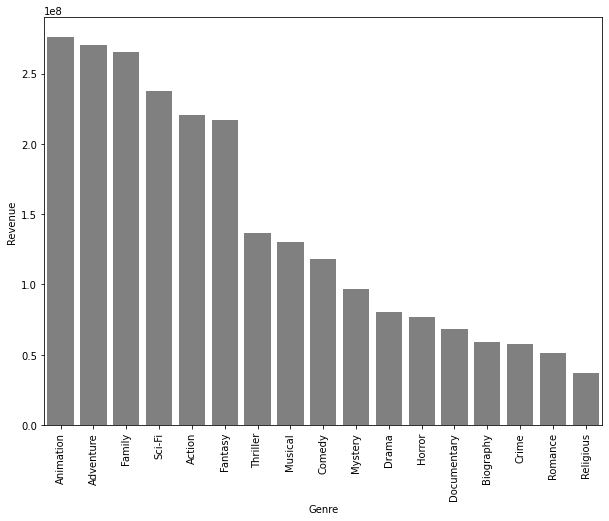

In [28]:
d_group = d_group.sort_values(by = 'Revenue', ascending = False)
fig, ax = plt.subplots(figsize = (10, 7.5))
ax.set_xticklabels(d_group.Genre, rotation = 90)
sns.barplot(data=d_group, x='Genre', y='Revenue', color = 'grey')

 - Above barplot shows the average Revenue of various genres of movies. Even though the number of Action movies made was highest, Adventure movies had the highest average revenue. 

<AxesSubplot:xlabel='Genre', ylabel='Metascore'>

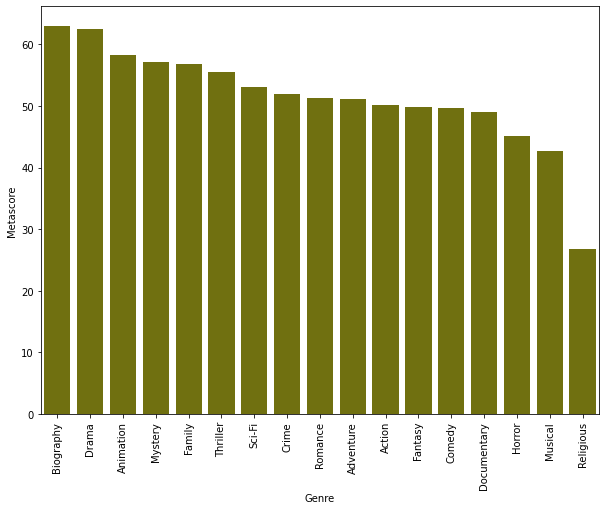

In [29]:
d_group = d_group.sort_values(by = 'Metascore', ascending = False)
fig, ax = plt.subplots(figsize = (10, 7.5))
ax.set_xticklabels(d_group.Genre, rotation = 90)
sns.barplot(data=d_group, x='Genre', y='Metascore',color = 'olive')

 - Above barplot shows the average Metascore of various genres of movies. Biography genre had the highest average Metascore. 

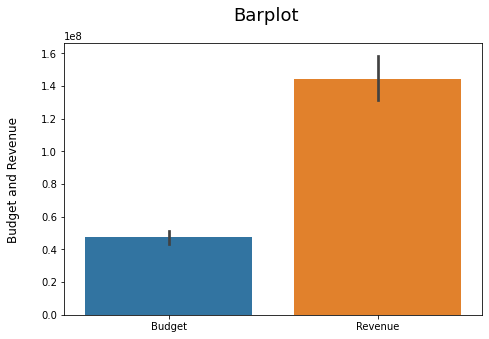

In [30]:
fig1 , ax1 = plt.subplots(figsize= (7.5,5))
fig1.suptitle('Barplot',fontsize = 18)
fig1.supylabel('Budget and Revenue')
ax1 = sns.barplot(data = d[['Budget', 'Revenue'] ] )

- We can see from the above plots that Revenue has a higher standard deviation than Budget

<AxesSubplot:>

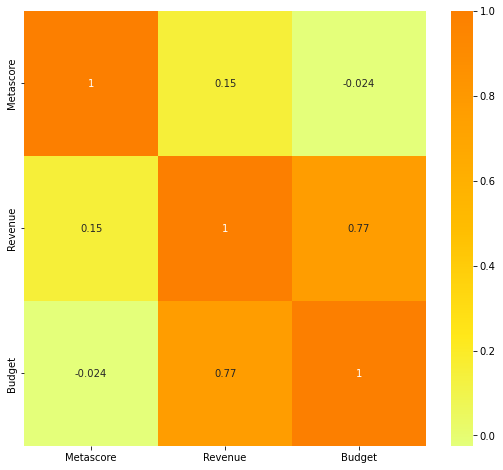

In [31]:
# correlation plot
fig, ax = plt.subplots(figsize = (9,8))
corr = d[['Metascore', 'Revenue', 'Budget' ]].corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True)

- The above plot shows Correlation between the numeric variables
- Budget and Revenue have a strong positive correlation, whereas Metascore has significantly less correlation with the other two variables

### Scatter plots of numeric variables

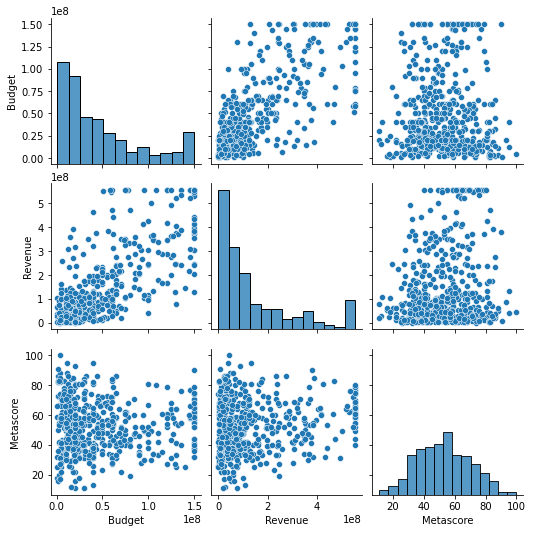

In [32]:
lis = ['Budget', 'Revenue', 'Metascore']
sns.pairplot(d[lis])

# Regression Analysis

### Revenue is the dependent variable while Budget is the predictor

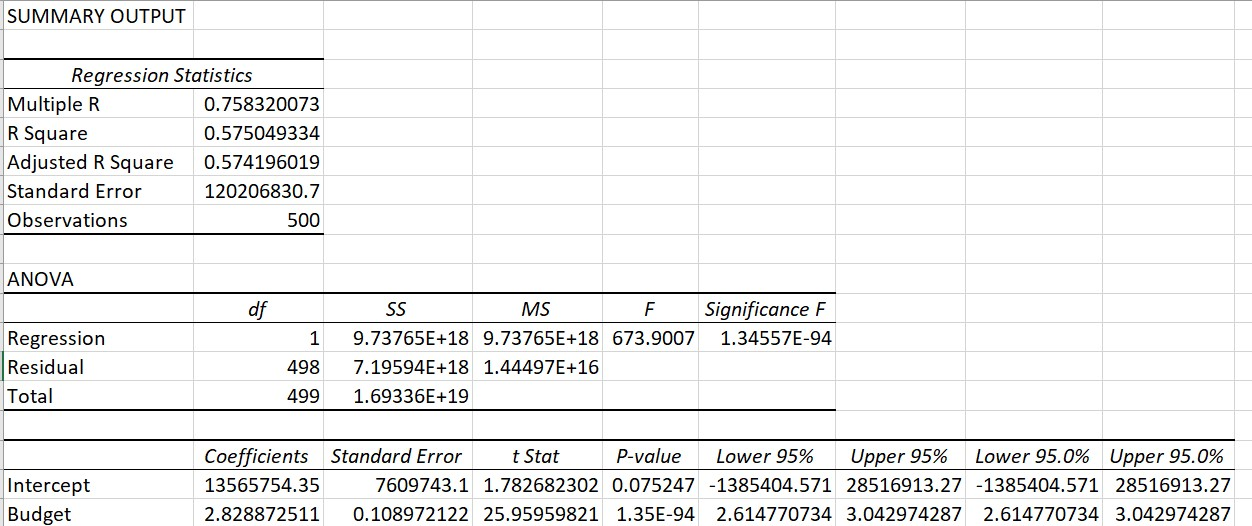

### Inference from the regression table with only Budget as the predictor

- R Square value of the model tells us that Budget as a predictor explains 57.5% of the total variablility of Revenue
- The F statistic is 673 and significance value is close to zero which implies that the overall model is statistically significant
- Intercept value is 13565754.35 which gives the value of Revenue when Budget is zero. The p-value for the same is higher than 5% signifance level which implies that the intercept value closer to zero would be better
- The coefficient of regression is 2.83 with the p-value close to zero (<0.025) which implies that the coefficient is likely not equal to zero

### Revenue is the dependent variable while Budget and Metascore are the predictor

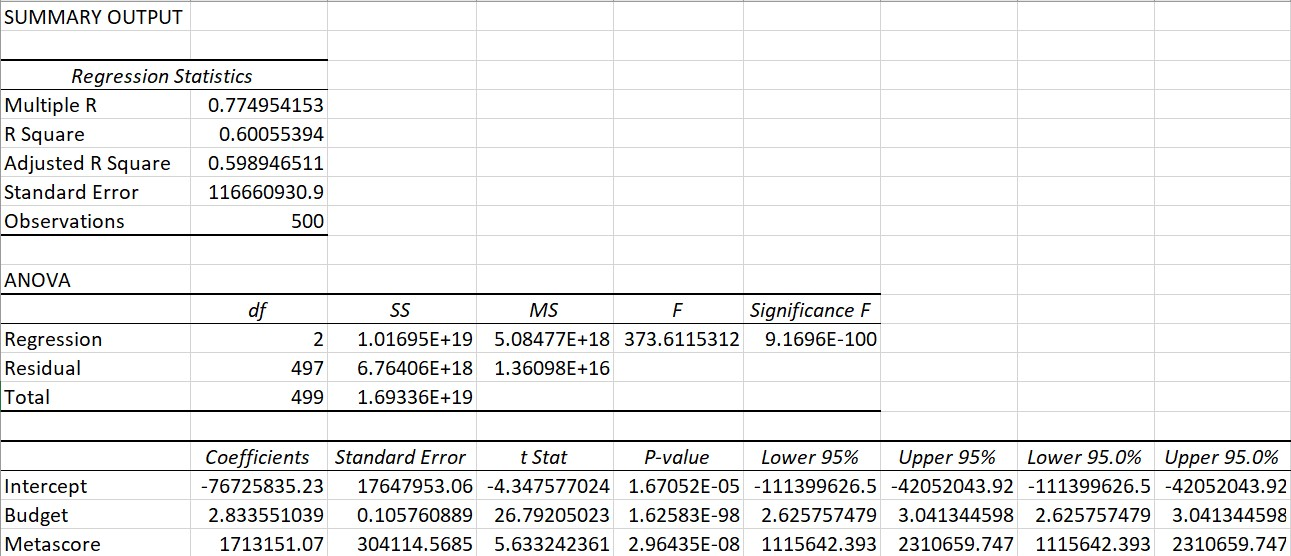

### Inference from the regression table with Budget and Metascore as predictors

- R Square value of the model tells us that Budget and Metascore as predictors explain 60% of the total variablility of Revenue
- Adjusted R square value penalises addition of a new variable. The adjusted R square value increased from 57.4% to 59.9% which means that with the addition of Metascore as a predictor the explanatory power of the model has increased
- The F statistic is 373.6 and significance value is close to zero which implies that the overall model is statistically significant
- Intercept value is -76725835 which gives the value of Revenue when Budget and Metascore are zero. 
- The Budget and Metascore coefficients are 2.83 and 1713151 with the p-value close to zero (<0.025) which implies that both the coefficients are likely not equal to zero

# Conclusion and Recommendations

 - By using a sample of movies data and analyzing it, we can quite convincingly say that Revenue is not independent of budget and critique
 - Intuitively, we feel that budget and critique do play a major role in deciding whether we should watch a movie or not and this analysis has shown us that our intuition is not wrong to a good extent
 - The two predictors capture/explain 60% of the variability of revenue. The chosen predictors fail to  capture the the remaning 40% of the variability
 - Some of the other factors that we have missed out could be star cast, genre, director, production house, promotions, release season, other ratings(IMDb, fandango, tomatometer), etc.